In [1]:
import plotly
from plotly.graph_objs import *

import networkx as nx

In [2]:
import pandas as pd

df = pd.read_csv("character_info.csv")

In [3]:
name = pd.read_csv("cht_to_name.csv",encoding = "ISO-8859-1")

In [4]:
cht_info = {}

for i in range(1,44):
    line = []
    for index,row in df.iterrows():
        if row["Character"] == "cht_"+str(i):
            if row["Row"] not in line:
                line.append(row["Row"])
    cht_info["cht_"+str(i)] = line

In [5]:
from matplotlib import pyplot as plt
import networkx as nx

G = nx.Graph()

for i in range(1,44):
    G.add_node(i)
    
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43))

In [6]:
for i in range(1,44):
    for j in range(i+1,44):
        cnt=0
        for l1 in cht_info["cht_"+str(i)]:
            for l2 in cht_info["cht_"+str(j)]:
                if abs(l1-l2)<4:
                    cnt = cnt+1
                    G.add_edge(i,j,weight=cnt)                   

In [7]:
print(G[1][2]['weight'])

482


In [8]:
name_list={}
cnt=1
for index,row in name.iterrows():
    nx.set_node_attributes(G, 'name', row["Character"])
    name_list[cnt]=row["Character"]
    cnt = cnt+1

In [31]:
d = nx.degree(G)
node_sizes = []
for i in range(1,44):
    node_sizes.append((d[i]+1)*20)

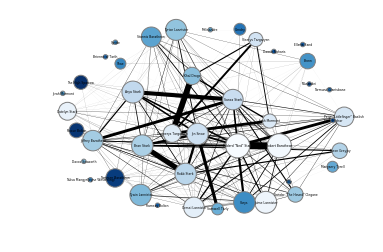

In [34]:
pos = nx.spring_layout(G,k=8,iterations=50)

nodes=nx.draw_networkx_nodes(G,pos,node_size=node_sizes,node_color=range(1,44),cmap=plt.cm.Blues)
nodes.set_edgecolor('grey')

edges = G.edges()
weights = [G[u][v]['weight']/70 for u,v in edges]
nx.draw_networkx_edges(G,pos,width=weights)

nx.draw_networkx_labels(G,pos,name_list,font_size=3)

plt.axis('off')
plt.savefig("relationship.png",dpi=1000)
plt.show()